In [1]:
# Imports
import pandas as pd

# Load dataset
df = pd.read_csv('owid-covid-data.csv')

# Quick structure check
print("Columns:\n", df.columns.tolist())
print("\nSample rows:\n", df.head())

# Missing values summary
print("\nMissing values:\n", df.isnull().sum().sort_values(ascending=False))


Columns:
 ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred

In [5]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Filter countries
countries_of_interest = ['Kenya', 'United States', 'India']
df_filtered = df[df['location'].isin(countries_of_interest)]

# Drop rows where essential columns are missing
critical_cols = ['total_cases', 'total_deaths', 'total_vaccinations']
df_cleaned = df_filtered.dropna(subset=['date'] + critical_cols, how='any')

# Fill remaining numeric missing values
df_cleaned.bfill()

# Quick preview
df_cleaned.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
140151,IND,Asia,India,2021-01-15,10527683.0,15590.0,16323.714,151918.0,191.0,192.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140152,IND,Asia,India,2021-01-16,10542841.0,15158.0,15886.000,152093.0,175.0,185.000,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140153,IND,Asia,India,2021-01-17,10557985.0,15144.0,15385.857,152274.0,181.0,182.143,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140154,IND,Asia,India,2021-01-18,10571773.0,13788.0,15025.429,152419.0,145.0,179.857,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN
140155,IND,Asia,India,2021-01-19,10581837.0,10064.0,14665.429,152556.0,137.0,175.571,...,20.6,59.55,0.53,69.66,0.645,1.417173e+09,NaN,NaN,NaN,NaN


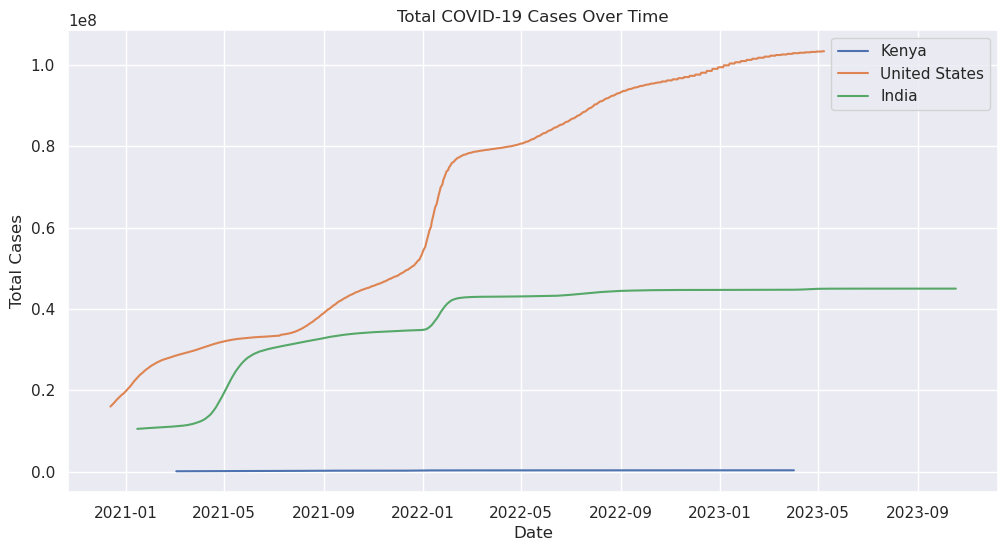

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style='darkgrid')

# Plot total cases over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.show()

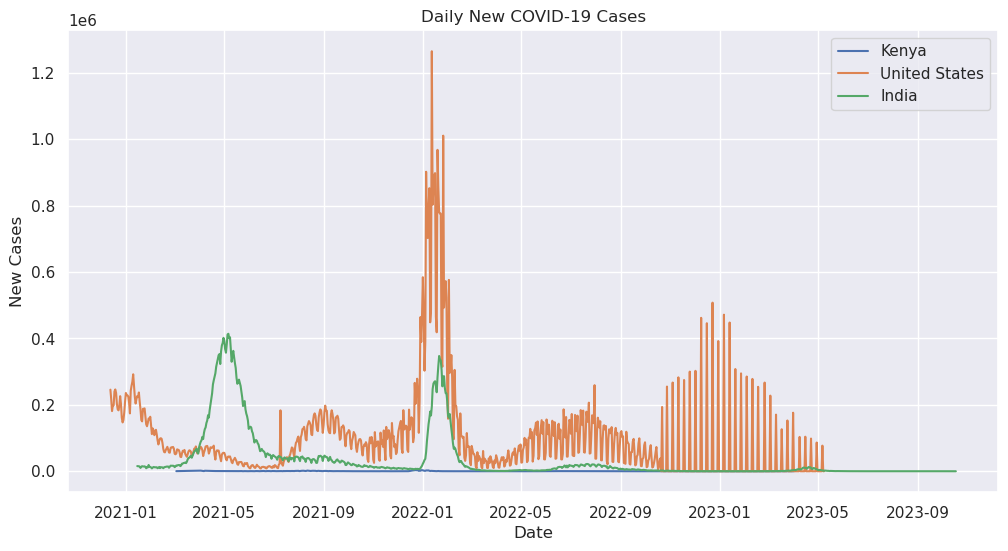

In [9]:
# Compare daily new cases
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title('Daily New COVID-19 Cases')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.show()

# Add a new column for death rate
df_cleaned = df_filtered.dropna(subset=['date'] + critical_cols, how='any').copy()


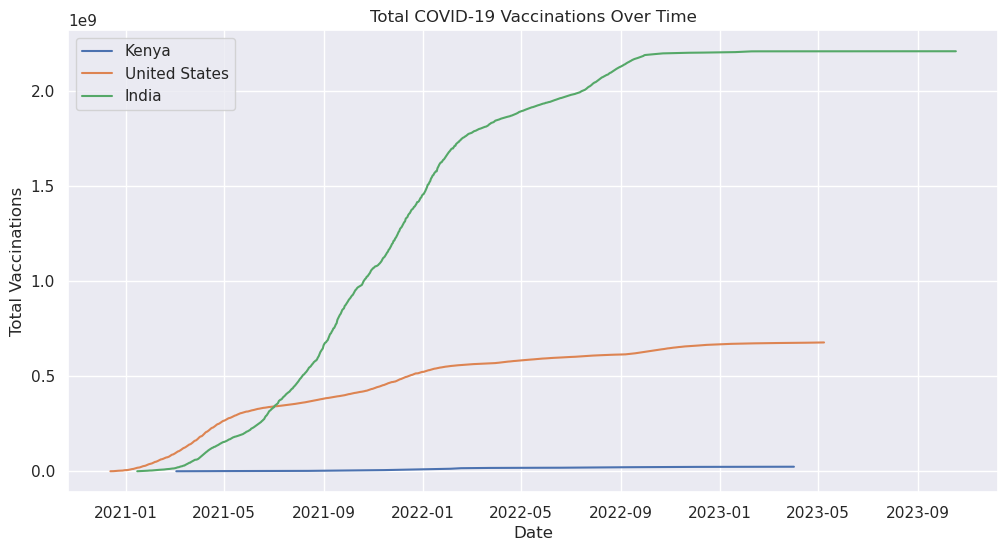

In [10]:
# Plot total vaccinations over time
plt.figure(figsize=(12, 6))
for country in countries_of_interest:
    country_data = df_cleaned[df_cleaned['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Total COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend()
plt.show()


### 📌 Key Insights

- The United States had the highest total cases, but also one of the fastest vaccine rollouts.
- Kenya showed lower case counts but also slower vaccine distribution.
- A noticeable spike in daily cases occurred in India during 2021-05 and 2022-01.